In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
import math
import warnings
import joblib
warnings.filterwarnings("ignore")

In [4]:
final_training_df = pd.read_csv(r'/content/drive/MyDrive/Research Paper/DATA/final_training_df.csv')
final_testing_df = pd.read_csv(r'/content/drive/MyDrive/Research Paper/DATA/final_testing_df.csv')

print(final_training_df.shape)
print(final_testing_df.shape)
print("The Datasets have been loaded...")

(250, 11)
(50, 11)
The Datasets have been loaded...


In [5]:
X_train = final_training_df.drop(['condition'], axis = 1)
Y_train = final_training_df['condition']

Y_train = np.array(Y_train)

X_test = final_testing_df.drop(['condition'], axis = 1)
Y_test = final_testing_df['condition']

Y_test = np.array(Y_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(250, 10) (250,)
(50, 10) (50,)


In [6]:
def plot_confusion_matrix(test_y, predict_y):

  from sklearn.metrics import confusion_matrix

  C = confusion_matrix(test_y, predict_y)
  
  print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100, '%')

 
  labels = [0,1,2,3,4,5]
  cmap=sns.light_palette("green")
  
  '''
  CONFUSION MATRIX
  '''
  print("-"*50, "Confusion matrix", "-"*50)
  plt.figure(figsize=(10,5))
  sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def extract_class_for_k_folds(X, Y, model):

  predicted_values_after_every_fold = []
  actual_values_after_every_fold = []

  kf = KFold(n_splits = 10, random_state = None, shuffle = False)

  for train_index, test_index in kf.split(X):

    X_train_fold, X_cv_fold = X.iloc[train_index], X.iloc[test_index]
    Y_train_fold, Y_cv_fold = Y[train_index], Y[test_index]

    model.fit(X_train_fold, Y_train_fold)

    model_predicted = model.predict(X_cv_fold)

    # to store the values after every fold
    predicted_values_after_every_fold.append(model_predicted)
    actual_values_after_every_fold.append(Y_cv_fold)

  return predicted_values_after_every_fold, actual_values_after_every_fold

# BEST OPTIMIZED SVM (HHO)

In [11]:
# to define the best model which we got using HHO 

from sklearn.svm import SVC

best_model =  SVC(kernel = 'rbf', C = 6.51794747, gamma = 0.06375978, verbose = 1)

# to send this best model in the function above to extract the predicted and actual values after every fold
predicted_best, actual = extract_class_for_k_folds(X_train, Y_train, best_model)

print(type(predicted_best), type(predicted_best[0]))
print(type(actual), type(actual[0]))

print(len(predicted_best), len(actual))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]<class 'list'> <class 'numpy.ndarray'>
<class 'list'> <class 'numpy.ndarray'>
10 10


In [12]:
print(predicted_best[0])

[5 3 1 5 1 1 1 1 0 3 2 1 1 4 3 3 4 0 1 4 5 3 0 3 1]


In [15]:
predicted_best = np.concatenate(predicted_best, axis = 0)
actual = np.concatenate(actual, axis = 0)

print(type(predicted_best), len(predicted_best))
print(type(actual), len(actual))

<class 'numpy.ndarray'> 250
<class 'numpy.ndarray'> 250


Number of misclassified points  4.3999999999999995 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


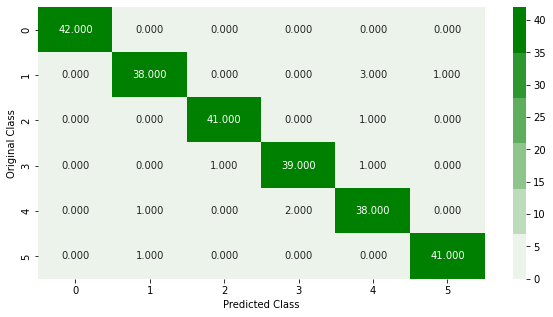

In [16]:
plot_confusion_matrix(actual, predicted_best)

# SIMPLE SVM WITH DEFAULT PARAMETERS

In [17]:
# to plot the confusion matrix of the SIMPLE SVM
from sklearn.svm import SVC

simple_model = SVC(kernel = 'linear', verbose = 1)

# to send this model into the 10 fold def to create the confusion matrix for 10-fold CV
predicted_simple, actual = extract_class_for_k_folds(X_train, Y_train, simple_model)

print(type(predicted_simple), len(predicted_simple))
print(type(actual), len(actual))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]<class 'list'> 10
<class 'list'> 10


In [18]:
predicted_simple[0]

array([5, 3, 1, 5, 1, 1, 1, 1, 0, 3, 2, 1, 1, 4, 3, 3, 4, 0, 1, 4, 5, 3,
       0, 3, 1])

In [19]:
predicted_simple = np.concatenate(predicted_simple, axis = 0)
actual = np.concatenate(actual, axis = 0)

print(type(predicted_simple), len(predicted_simple))
print(type(actual), len(actual))

<class 'numpy.ndarray'> 250
<class 'numpy.ndarray'> 250


Number of misclassified points  6.4 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


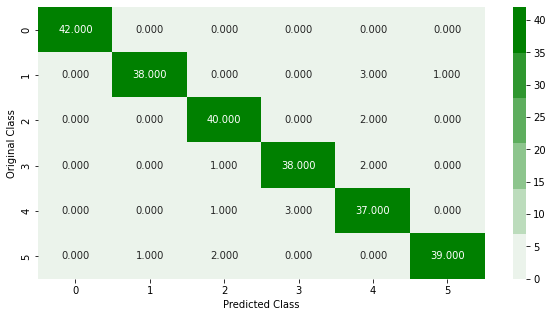

In [20]:
plot_confusion_matrix(actual, predicted_simple)